# Unit 5 - Financial Planning

In [14]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import pathlib
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [15]:
# Load .env enviroment variables
home = pathlib.Path.home() / ".env"  # for pc 1/2
load_dotenv(dotenv_path=home)  # for pc 2/2

True

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-14', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2021-10-14', tz='America/Chicago').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker = ["AGG","SPY"]

# Set timeframe to '1D'
timeframe = "1D"

# Get 1 year's worth of historical data for Bonds and Stocks
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open     high      low   close   volume    open   
time                                                                           
2017-10-25 00:00:00-04:00  108.96  109.130  108.950  109.11  2706969  256.19   
2017-10-26 00:00:00-04:00  109.20  109.229  108.980  109.00  1488075  255.99   
2017-10-27 00:00:00-04:00  109.07  109.260  109.035  109.24  1527412  256.50   
2017-10-30 00:00:00-04:00  109.43  109.560  109.360  109.53  1719161  257.07   
2017-10-31 00:00:00-04:00  109.52  109.550  109.440  109.45  2427946  257.18   

                                                              
                             high      low   close    volume  
time                                                          
2017-10-25 00:00:00-04:00  256.31  254.000  255.30  72200254  
2017-10-26 00:00:00-04:00  256.30  255.560  255.59  37718330  
2017-10-27 00:00:00-04:00  257.89  256.160  257.68  49910859  
2017-10-30 00:00:00-04:00  257.60  256.410  256.80  37073374  
2017-10-31 00:00:00-04:00  257.44  256.805  257.11  35711419

In [22]:
# Eventual goal:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# Configure a Monte Carlo simulation (n=100) to forecast one years cumulative returns
MC_retire_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 100,
    num_trading_days = 252*30
)



In [23]:
# Print the simulation input data
MC_retire_dist.portfolio_data.head()

AGG                                     \
                             open     high      low   close   volume   
time                                                                   
2017-10-25 00:00:00-04:00  108.96  109.130  108.950  109.11  2706969   
2017-10-26 00:00:00-04:00  109.20  109.229  108.980  109.00  1488075   
2017-10-27 00:00:00-04:00  109.07  109.260  109.035  109.24  1527412   
2017-10-30 00:00:00-04:00  109.43  109.560  109.360  109.53  1719161   
2017-10-31 00:00:00-04:00  109.52  109.550  109.440  109.45  2427946   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-10-25 00:00:00-04:00          NaN  256.19  256.31  254.000  255.30   
2017-10-26 00:00:00-04:00    -0.001008  255.99  256.30  255.560  255.59   
2017-10-27 00:00:00-04:00     0.002202  256.50  257.89  256.160  257.68   
2017-10-30 00:00:00-04:00     0.002655  257.07  257.60  256.410  256.80   
2017-10-31 00:00:00-04:00    -0.000730  257.18  257.44  256.805  257.11   

                                                  
                             volume daily_return  
time                                              
2017-10-25 00:00:00-04:00  72200254          NaN  
2017-10-26 00:00:00-04:00  37718330     0.001136  
2017-10-27 00:00:00-04:00  49910859     0.008177  
2017-10-30 00:00:00-04:00  37073374    -0.003415  
2017-10-31 00:00:00-04:00  35711419     0.001207

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_retire_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994702,0.986412,1.015210,0.997131,1.001994,0.991433,0.995886,0.994797,0.992674,1.014130,...,0.996875,0.997773,0.997701,0.995097,1.008737,0.994640,1.000780,1.006205,0.995330,1.003334
2,0.998494,0.997078,1.005873,0.998546,0.995102,0.995529,0.999527,1.011913,0.989558,1.018314,...,1.001147,0.995823,1.013868,1.001198,1.010478,0.995870,0.997961,1.014303,1.015582,1.011702
3,1.003035,1.012378,1.012538,0.996196,1.001170,1.000499,1.009243,1.012030,0.989193,1.007187,...,0.999204,1.001288,1.007614,0.997192,1.015178,0.987246,0.992898,1.018992,1.022084,1.015328
4,1.005846,1.009569,1.015386,0.999919,0.998710,1.006141,1.007984,1.024720,0.991985,1.012774,...,1.009154,0.999075,1.004578,1.004776,1.020194,0.996215,0.996776,1.028677,1.028710,1.021674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.731560,7.505464,6.017674,4.991169,5.473533,20.324397,17.886718,8.469204,7.122221,11.651122,...,14.265819,11.219017,19.095409,7.340367,7.162968,9.473999,3.424282,8.424083,10.724952,21.074986
7557,10.659303,7.542231,6.063878,4.982055,5.509011,20.211575,17.893296,8.418401,7.073105,11.622703,...,14.350240,11.114150,19.110954,7.353226,7.188238,9.463827,3.438865,8.393185,10.709662,21.242586
7558,10.661964,7.563823,6.074883,5.006821,5.497446,20.401737,18.004324,8.485789,7.063104,11.549154,...,14.432014,10.968468,19.252549,7.319444,7.112208,9.560928,3.441243,8.335354,10.703314,21.345695
7559,10.653038,7.542827,6.038360,5.036295,5.549640,20.522258,17.976663,8.477888,7.113651,11.529873,...,14.415514,10.906747,19.150195,7.293374,7.031298,9.801488,3.448652,8.349926,10.776495,21.440920


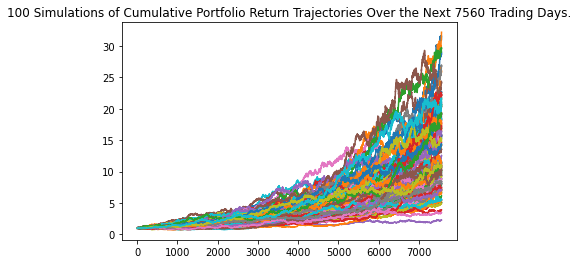

In [25]:
# Plot simulation outcomes
line_plot = MC_retire_dist.plot_simulation()

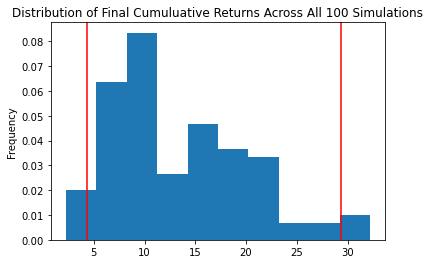

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_retire_dist.plot_distribution()

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
retire_tbl = MC_retire_dist.summarize_cumulative_return()

# Print summary statistics
print(retire_tbl)

count           100.000000
mean             13.390479
std               6.660224
min               2.249277
25%               8.277998
50%              11.293625
75%              17.912327
max              32.211957
95% CI Lower      4.350281
95% CI Upper     29.356696
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
#Lower as defined above, is the 8th index, 15000 as stated in instructions, 2 digits rounded to
ci_lower = round(retire_tbl[8]*initial_investment,2)
#Upper as defined above, is the 9th index, 15000 as stated in instructions, 2 digits rounded to
ci_upper = round(retire_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $87005.62 and $587133.92


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
updated_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
#Lower as defined above, is the 8th index, 15000 as stated in instructions, 2 digits rounded to
more_ci_lower = round(retire_tbl[8]*updated_investment,2)
#Upper as defined above, is the 9th index, 15000 as stated in instructions, 2 digits rounded to
more_ci_upper = round(retire_tbl[9]*updated_investment,2)

# Print results
print(f"There is a 95% chance that an increased investment of ${updated_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${more_ci_lower} and ${more_ci_upper}")

There is a 95% chance that an increased investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $130508.43 and $880700.87


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Retirement fund goal: $6000/mo = $ 72000 per year for 10 years or $ 720,000 Fund amount.
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns that would equal that amount.


# Goal of this code:
# Configuring a Monte Carlo simulation to 
#forecast 5 years cumulative returns of a larger investment and/or riskier options in order to still
# have $ 720,000 available in 5 years. 

# attempt 1: 75% stock, 25% bonds

# Configure a Monte Carlo simulation (n=100) to forecast one years cumulative returns
MC_retr5yr_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.75,.25],
    num_simulation = 100,
    num_trading_days = 252*5
)

print(MC_retr5yr_dist.portfolio_data.head())


                              AGG                                     \
                             open     high      low   close   volume   
time                                                                   
2017-10-25 00:00:00-04:00  108.96  109.130  108.950  109.11  2706969   
2017-10-26 00:00:00-04:00  109.20  109.229  108.980  109.00  1488075   
2017-10-27 00:00:00-04:00  109.07  109.260  109.035  109.24  1527412   
2017-10-30 00:00:00-04:00  109.43  109.560  109.360  109.53  1719161   
2017-10-31 00:00:00-04:00  109.52  109.550  109.440  109.45  2427946   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-10-25 00:00:00-04:00          NaN  256.19  256.31  254.000  255.30   
2017-10-26 00:00:00-04:00    -0.001008  255.99  256.30  255.560  255.59   
2017-10-27 00:00:00-04:00     0.002202  256.50  

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
print(MC_retr5yr_dist.calc_cumulative_return())

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
            0         1         2         3         4         5         6   \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.001955  0.996556  0.997147  0.998987  0.999106  1.003771  1.003845   
2     0.989829  1.003275  0.998021  0.999202  0.995139  1.004849  1.007828   
3     0.987233  1.000378  0.996945  0.991640  0.988910  1.005289  1.011599   
4     0.984406  1.000504  0.994163  0.988764  0.983158  1.005053  1.010910   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.238332  1.374018  1.715410 

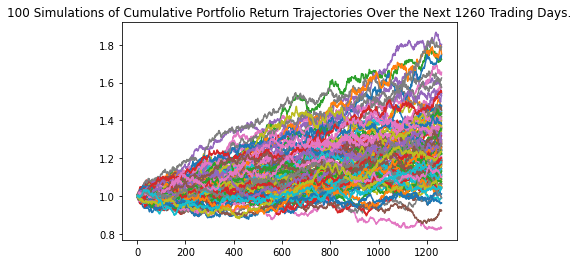

In [34]:
# Plot simulation outcomes
line_plot = MC_retr5yr_dist.plot_simulation()

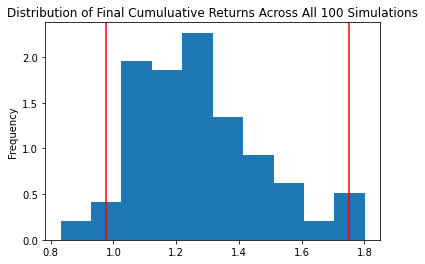

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_retr5yr_dist.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
retr5yr_tbl = MC_retr5yr_dist.summarize_cumulative_return()

# Print summary statistics
print(retr5yr_tbl)

count           100.000000
mean              1.271371
std               0.199671
min               0.831171
25%               1.126575
50%               1.244476
75%               1.384352
max               1.801514
95% CI Lower      0.975717
95% CI Upper      1.749897
Name: 1260, dtype: float64


In [40]:
# Set nest-egg investment in 5-year plan here:
nest5_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
n5_ci_lower = round(retr5yr_tbl[8]*nest5_investment,2)
#Upper as defined above, is the 9th index, 15000 as stated in instructions, 2 digits rounded to
n5_ci_upper = round(retr5yr_tbl[9]*nest5_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${nest5_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${n5_ci_lower} and ${n5_ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58542.99 and $104993.79


### Ten Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Retirement fund goal: $6000/mo = $ 72000 per year for 10 years or $ 720,000 Fund amount.
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns that would equal that amount.


# Goal of this code:
# Configuring a Monte Carlo simulation to 
#forecast 10 years cumulative returns of a larger investment and/or riskier options in order to still
# have $ 720,000 available in 5 years. 

# attempt 1: 60% stock, 40% bonds

# Configure a Monte Carlo simulation (n=100) to forecast one years cumulative returns
MC_retr10yr_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 100,
    num_trading_days = 252*10
)

print(MC_retr10yr_dist.portfolio_data.head())

                              AGG                                     \
                             open     high      low   close   volume   
time                                                                   
2017-10-25 00:00:00-04:00  108.96  109.130  108.950  109.11  2706969   
2017-10-26 00:00:00-04:00  109.20  109.229  108.980  109.00  1488075   
2017-10-27 00:00:00-04:00  109.07  109.260  109.035  109.24  1527412   
2017-10-30 00:00:00-04:00  109.43  109.560  109.360  109.53  1719161   
2017-10-31 00:00:00-04:00  109.52  109.550  109.440  109.45  2427946   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-10-25 00:00:00-04:00          NaN  256.19  256.31  254.000  255.30   
2017-10-26 00:00:00-04:00    -0.001008  255.99  256.30  255.560  255.59   
2017-10-27 00:00:00-04:00     0.002202  256.50  

In [42]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
print(MC_retr10yr_dist.calc_cumulative_return())

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
            0         1         2         3         4         5         6   \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.991384  1.006016  0.991163  0.992813  1.005659  0.995260  1.006367   
2     0.999043  1.004672  0.994987  0.981180  0.999810  0.996611  1.012379   
3     1.010241  1.014593  0.993451  0.984541  1.000085  0.994916  1.022032   
4     1.008284  1.006680  0.984243  0.993494  0.996487  0.998272  1.021785   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.874066  1.077445  2.001223 

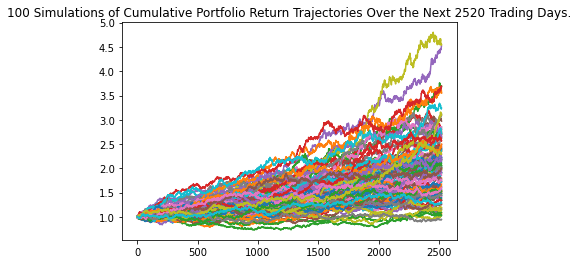

In [43]:
# Plot simulation outcomes
line_plot = MC_retr10yr_dist.plot_simulation()

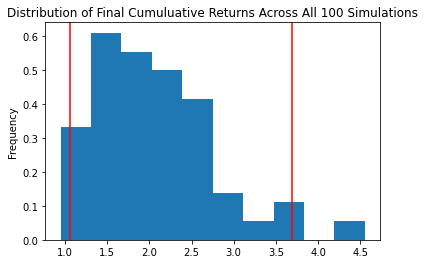

In [44]:
# Plot probability distribution and confidence intervals
dist_plot = MC_retr10yr_dist.plot_distribution()

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
retr10yr_tbl = MC_retr10yr_dist.summarize_cumulative_return()

# Print summary statistics
print(retr10yr_tbl)

count           100.000000
mean              2.070712
std               0.724802
min               0.947848
25%               1.493326
50%               1.995987
75%               2.440282
max               4.554131
95% CI Lower      1.061021
95% CI Upper      3.687688
Name: 2520, dtype: float64


In [47]:
# Set nest egg increased investment amount to $ 60,000
nest10_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
n10_ci_lower = round(retr10yr_tbl[8]*nest10_investment,2)
#Upper as defined above, is the 9th index, 15000 as stated in instructions, 2 digits rounded to
n10_ci_upper = round(retr10yr_tbl[9]*nest10_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${nest10_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${n10_ci_lower} and ${n10_ci_upper}")


There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $63661.28 and $221261.29
